# Regression

## Linear Regression

## Initially we import our libraries and set the paths

In [1]:
import pandas as pd
import getpass
from IPython.core.debugger import set_trace
uname=getpass.getuser()
from IPython.core.debugger import Tracer
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

In [2]:
filepath='/Users/{0}/Documents/aris/insideairbnb/'.format(uname)
print(filepath)

/Users/Aris/Documents/aris/insideairbnb/


## Import our data from "airbnb_London.csv" and quality check (QC)

In [3]:
df = pd.read_csv(filepath+'airbnb_London.csv', sep=',',low_memory=False)

In [4]:
# Identify and drop nan values in our dataset
df_clean = df.dropna(subset=['price','zipcode','market',
    'smart_location','latitude','longitude','is_location_exact',
    'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit','cleaning_fee'])

df_clean_columns = df_clean[['price','zipcode','market',
    'smart_location','latitude','longitude','is_location_exact',
    'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit','cleaning_fee']]


In [5]:
# Feature engineering
# Check type of each column
df_clean_columns.dtypes
pd.options.mode.chained_assignment = None 

df_clean_columns['zipcode'] = df_clean_columns['zipcode'].map(lambda x: x[:3])
df_clean_columns['price'] = df_clean_columns['price'].map(lambda x: x[1:])
df_clean_columns['price'] = df_clean_columns['price'].map(lambda x: x.replace(",",""))
df_clean_columns['price'] = df_clean_columns['price'].astype(float)
df_clean_columns['bathrooms'] = df_clean_columns['bathrooms'].astype(float)
df_clean_columns['beds'] = df_clean_columns['beds'].astype(float)
df_clean_columns['security_deposit'] = df_clean_columns['security_deposit'].map(lambda x: x[1:])
df_clean_columns['security_deposit'] = df_clean_columns['security_deposit'].map(lambda x: x.replace(",",""))
df_clean_columns['security_deposit'] = df_clean_columns['security_deposit'].astype(float)
df_clean_columns['cleaning_fee'] = df_clean_columns['cleaning_fee'].map(lambda x: x[1:])
df_clean_columns['cleaning_fee'] = df_clean_columns['cleaning_fee'].map(lambda x: x.replace(",",""))
df_clean_columns['cleaning_fee'] = df_clean_columns['cleaning_fee'].astype(float)


# Produce better dataset with the rows of exact location
df_best = df_clean_columns.loc[df['is_location_exact'] == 't']


# Final column types
df_clean_columns.dtypes

price                float64
zipcode               object
market                object
smart_location        object
latitude             float64
longitude            float64
is_location_exact     object
property_type         object
room_type             object
accommodates           int64
bathrooms            float64
bedrooms             float64
beds                 float64
bed_type              object
security_deposit     float64
cleaning_fee         float64
dtype: object

### Output the mean, min and max values of each column to check for possible outliers in our data (Data exploratory analysis(EDA))

In [6]:
# QC the data for outliers
df_clean_columns.describe()

price      latitude     longitude  accommodates     bathrooms  \
count  50691.000000  50691.000000  50691.000000  50691.000000  50691.000000   
mean     137.497702     51.509588     -0.130446      3.590637      1.347912   
std      227.966493      0.042949      0.087326      2.132087      0.647845   
min        0.000000     51.297120     -0.501300      1.000000      0.000000   
25%       55.000000     51.487525     -0.188310      2.000000      1.000000   
50%       99.000000     51.513740     -0.130290      3.000000      1.000000   
75%      154.000000     51.534460     -0.073535      4.000000      1.500000   
max    12345.000000     51.679200      0.285390     16.000000     17.000000   

           bedrooms          beds  security_deposit  cleaning_fee  
count  50691.000000  50691.000000      50691.000000  50691.000000  
mean       1.536703      1.922215        200.890513     46.204514  
std        0.993414      1.381002        323.654934     47.490326  
min        0.000000      0.000000          0.000000      0.000000  
25%        1.000000      1.000000          0.000000     15.000000  
50%        1.000000      2.000000        100.000000     35.000000  
75%        2.000000      2.000000        250.000000     64.000000  
max       22.000000     55.000000       4098.000000    850.000000

In [7]:
# Encode strings in dataset
df_clean_columns.zipcode,levels = pd.factorize(df_clean_columns.zipcode)
df_clean_columns.market,levels = pd.factorize(df_clean_columns.market)
df_clean_columns.smart_location,levels = pd.factorize(df_clean_columns.smart_location)
df_clean_columns.is_location_exact,levels = pd.factorize(df_clean_columns.is_location_exact)
df_clean_columns.property_type,levels = pd.factorize(df_clean_columns.property_type)
df_clean_columns.room_type,levels = pd.factorize(df_clean_columns.room_type)
df_clean_columns.bed_type,levels = pd.factorize(df_clean_columns.bed_type)


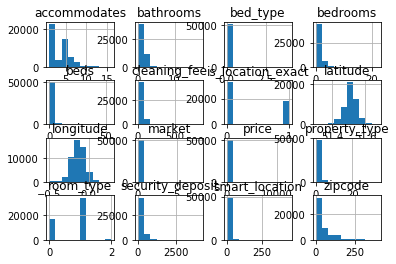

In [8]:
# Check values by plotting a histogram
df_clean_columns.hist()
plt.show()

In [9]:
y = df_clean_columns.price # define the target variable (dependent variable) as y
df_X = df_clean_columns.loc[:, df_clean_columns.columns != 'price'].values
X = df_X
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(40552, 15) (40552,)
(10139, 15) (10139,)


In [10]:
# Fit a simple linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


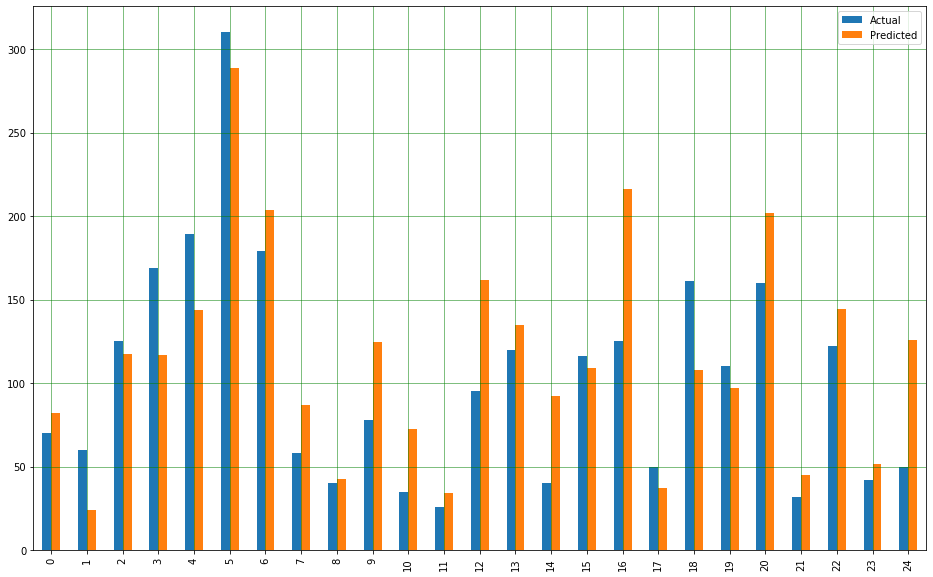

In [11]:
y_test = y_test.values
# Visualise results
df_vis = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df_vis.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
# Calculate validation values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 62.223515707298716
Mean Squared Error: 59145.86723566301
Root Mean Squared Error: 243.1992336247444


## Adaboost and Decision tree

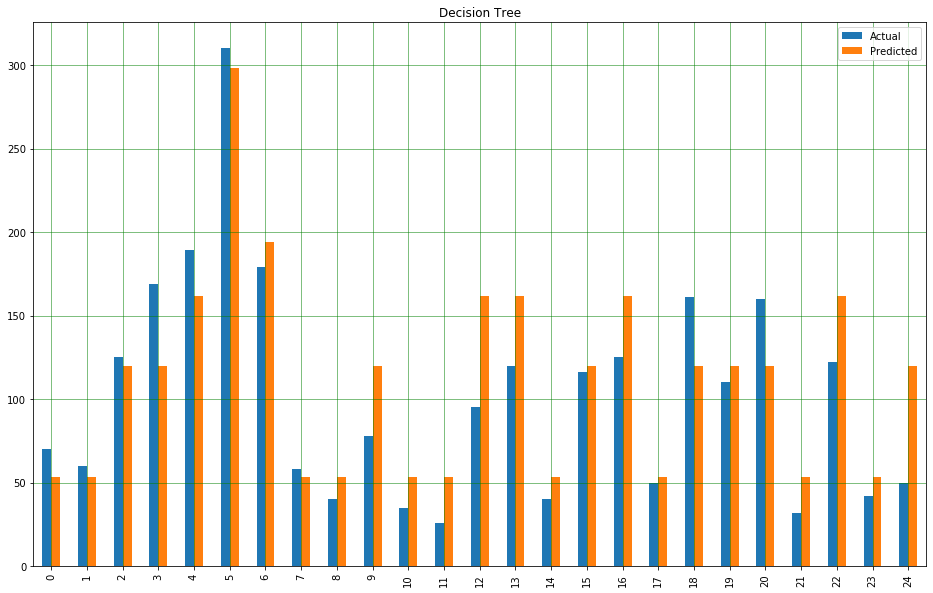

Mean Absolute Error (Decision Tree): 62.44687533389696
Mean Squared Error (Decision Tree): 49729.702203886634
Root Mean Squared Error (Decision Tree): 223.0015744426183


In [13]:
rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10, random_state=rng)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)

# Visualise results
df_vis = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
df1 = df_vis.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Decision Tree")
plt.show()

# Calculate validation values
print('Mean Absolute Error (Decision Tree):', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error (Decision Tree):', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (Decision Tree):', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

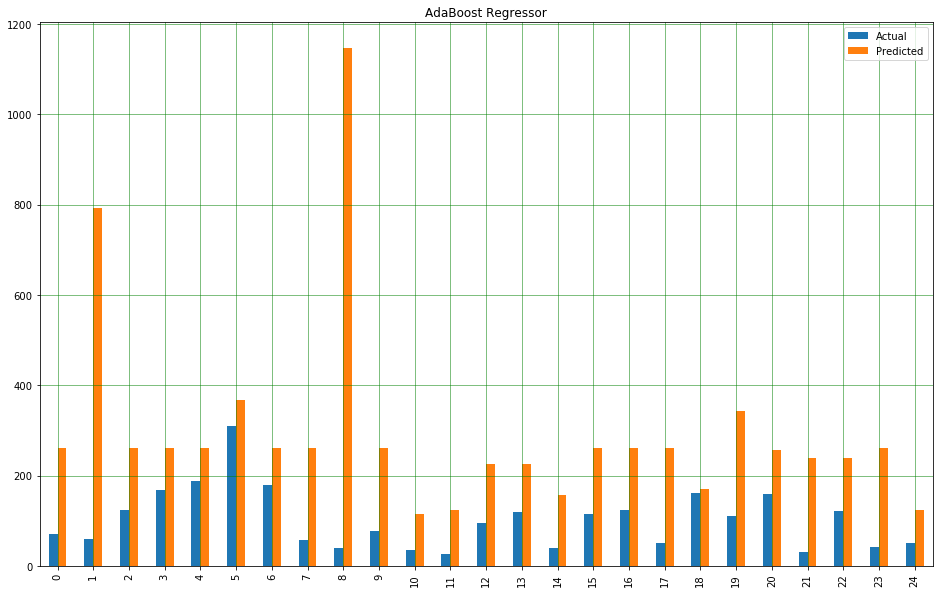

Mean Absolute Error (AdaBoost): 146.93627150492395
Mean Squared Error (AdaBoost): 74706.48344056372
Root Mean Squared Error (AdaBoost): 273.32486795124174


In [14]:
df_vis = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
df1 = df_vis.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("AdaBoost Regressor")
plt.show()

# Calculate validation values
print('Mean Absolute Error (AdaBoost):', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (AdaBoost):', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (AdaBoost):', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

## Random forest regression

Note: time demanding

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 150.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 261.8min finished


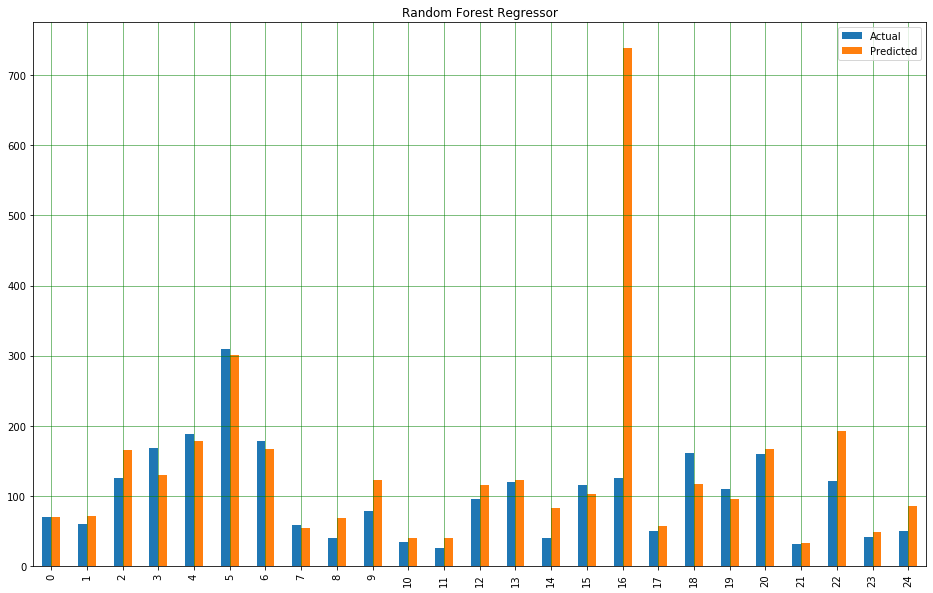

Mean Absolute Error (RF): 42.53628813670299
Mean Squared Error (RF): 35008.728646205105
Root Mean Squared Error (RF): 187.1061961726685
R squared (RF): 47.94371544723661


In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred3 = rf_random.predict(X_test)

df_vis = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()})
df1 = df_vis.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Random Forest Regressor")
plt.show()

# Calculate validation values
print('Mean Absolute Error (RF):', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error (RF):', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error (RF):', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R squared (RF): ' + str(rf_random.score(X_test, y_test)*100)) #Good metric for linear regression

In [15]:
# Possible overfitting of our model maybe a k-fold cross validation should be performed
# Perform K-Fold Cross Validation
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
y = df_clean_columns.price.values
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model = lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    scores.append(lm.score(X_test, y_test))

# Mean value of r2 scores (each iteration produces an r2 score)
print(str(np.mean(scores)*100)+"%")
print(cross_val_score(lm, X, y, cv=10))

Train Index:  [ 5070  5071  5072 ... 50688 50689 50690] 

Test Index:  [   0    1    2 ... 5067 5068 5069]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [ 5070  5071  5072 ... 10136 10137 10138]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [10139 10140 10141 ... 15205 15206 15207]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [15208 15209 15210 ... 20274 20275 20276]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [20277 20278 20279 ... 25343 25344 25345]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [25346 25347 25348 ... 30412 30413 30414]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [30415 30416 30417 ... 35481 35482 35483]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [35484 35485 35486 ... 40550 40551 40552]
Train Index:  [    0     1     2 ... 50688 50689 50690] 

Test Index:  [40553 40554 40555 ... 45619 45